In [1]:
import numpy as np
import matplotlib.pyplot as plt

Potential with `Rotation` (yz term) and `Squeeze` ($y^2-z^2$ term):
$$
\Phi = a(y^2+z^2)+2byz+c(y^2-z^2)
$$
Diagnalize this function we can get the eigenvalues (mode frequency) and eigenvectors (rotated axis):

Eigenvalues:
$$
\omega_1^2 = a-\sqrt{b^2+c^2}\\
\omega_2^2 = a+\sqrt{b^2+c^2}
$$
Eigenvectors:
$$
v_1 = \{\frac{c-\sqrt{b^2+c^2}}{b}, 1\}\\
v_2 = \{\frac{c+\sqrt{b^2+c^2}}{b}, 1\}
$$

In [2]:
import pandas as pd
data_rot = pd.read_excel('data20230411.xlsx', sheet_name='Rotation')
data_rot

,Rotation,Freq 1,Radial freq1 (MHz),Freq 2,Radial freq2 (MHz)
0,-0.6,209.533,1.6935,209.2522,1.4127
1,-0.5,209.516,1.6765,209.2832,1.4437
2,-0.4,209.501,1.6615,209.3004,1.4609
3,-0.3,209.497,1.6575,209.3119,1.4724
4,-0.2,209.466,1.6265,209.3073,1.4678
5,-0.1,209.501,1.6615,209.2945,1.455
6,0,209.527,1.6875,209.3073,1.4678
7,0.1,209.56,1.7205,209.252,1.4125
8,0.2,209.5834,1.7439,209.223,1.3835
9,0.3,209.61,1.7705,209.189,1.3495


In [3]:
data_rot.keys()

Index(['Rotation', 'Freq 1', 'Radial freq1 (MHz)', 'Freq 2',
       'Radial freq2 (MHz)'],
      dtype='object')

In [4]:
## Red chamber
b_list = [float(data_rot['Rotation'][i]) for i in range(len(data_rot))]
w1_dt = [float(data_rot['Radial freq1 (MHz)'][i]) for i in range(len(data_rot))]
w2_dt = [float(data_rot['Radial freq2 (MHz)'][i]) for i in range(len(data_rot))]
w_sec = [np.sqrt((w1_dt[i]**2+w2_dt[i]**2)/2) for i in range(len(data_rot))]
a = np.mean(w_sec)**2 # secular freq
a = a+0.04

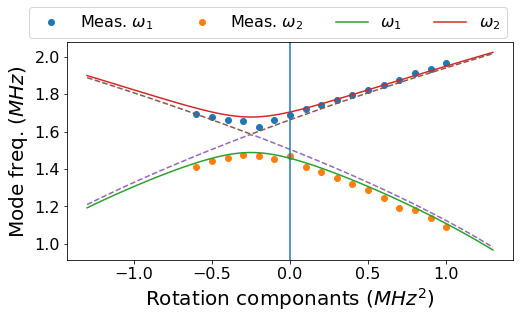

In [28]:
SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## For Red chamber, we want the axis is 45 degree, so we apply the rotation and want the squeeze to be zero.
b_ls = np.linspace(-1.3, 1.3, 101)
offset = -0.25
slope = 1.0
c = 0.3
w1_0 = []
w2_0 = []
w1 = []
w2 = []
for b in b_ls:
    w1_0.append(np.sqrt(a-slope*np.sqrt((b-offset)**2)))
    w2_0.append(np.sqrt(a+slope*np.sqrt((b-offset)**2)))
    w1.append(np.sqrt(a-slope*np.sqrt((b-offset)**2+c**2)))
    w2.append(np.sqrt(a+slope*np.sqrt((b-offset)**2+c**2)))
plt.figure(figsize = (8,4))
plt.plot(b_list, w1_dt,'o', label = r'Meas. $\omega_1$')
plt.plot(b_list, w2_dt,'o', label = r'Meas. $\omega_2$')
plt.plot(b_ls, w1, label = r'$\omega_1$')
plt.plot(b_ls, w2, label = r'$\omega_2$')
plt.plot(b_ls, w1_0, '--')
plt.plot(b_ls, w2_0, '--')
plt.axvline(x = 0)
plt.xlabel(r'Rotation componants ($MHz^2$)')
plt.ylabel(r'Mode freq. ($MHz$)')
plt.legend(loc = 'upper center', bbox_to_anchor=(0.45, 1.2), ncol=6)
plt.savefig('Fig2_Mode_freqs.png', dpi=300, bbox_inches='tight')

In [39]:
data_squ = pd.read_excel('data20230411.xlsx', sheet_name='Squeeze')
data_squ

,Squeeze,z_comp,y_comp,x_comp,COM freq,Radial freq (MHz)
0,-0.5,0,0,0,209.5322,1.6927
1,-0.48,0,0,0,209.5322,1.6927
2,-0.46,0,0,0,209.5296,1.6901
3,-0.44,0,0,0,209.5289,1.6894
4,-0.42,0,0,0,209.5292,1.6897
5,-0.4,0,0,0,209.5286,1.6891
6,-0.38,0,0,0,209.5292,1.6897
7,-0.36,0,0,0,209.5286,1.6891
8,-0.34,0,0,0,209.5287,1.6892
9,-0.32,0,0,0,209.5275,1.688


In [67]:
c_list = [float(data_squ['Squeeze'][i]) for i in range(len(data_squ))]
w_dt = [float(data_squ['Radial freq (MHz)'][i]) for i in range(len(data_squ))]
a = np.mean(w_sec)**2 # secular freq
a = a+0.08
np.sqrt(a)

1.5980468749133943

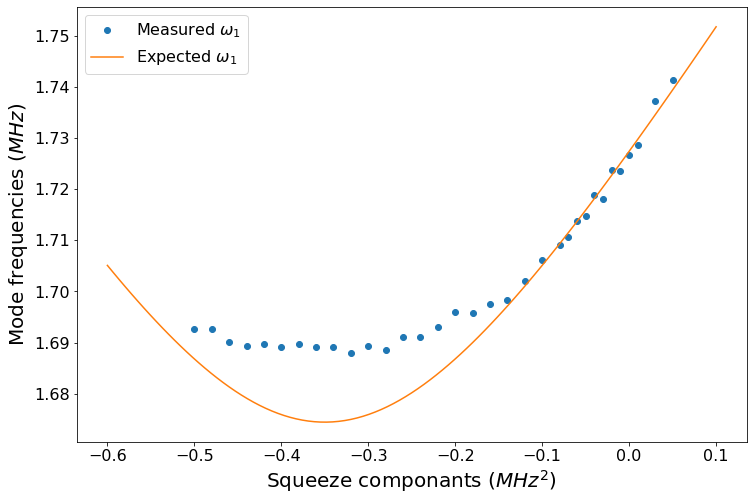

In [69]:
c_ls = np.linspace(-0.6, 0.1, 101)
offset = -0.25
slope = 1.0
w1 = []
b = 0
c_offset = -0.35
for c in c_ls:
    w1.append(np.sqrt(a+slope*np.sqrt((b-offset)**2+(c-c_offset)**2)))
plt.figure(figsize = (12,8))
plt.plot(c_list, w_dt,'o', label = r'Measured $\omega_1$')
plt.plot(c_ls, w1, label = r'Expected $\omega_1$')
plt.xlabel(r'Squeeze componants ($MHz^2$)')
plt.ylabel(r'Mode frequencies ($MHz$)')
plt.legend()

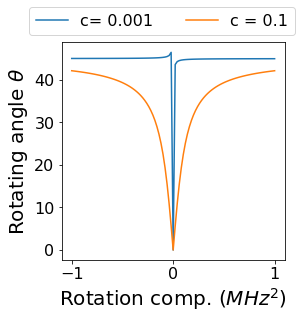

In [27]:
b_ls = np.linspace(-1, 1, 101)
c = 0.1
theta_0 = []
theta = []
for b in b_ls:
    theta_0.append(np.arctan(b/(0.001+b))*180/np.pi)
    theta.append(abs(np.arctan(b/(c+np.sqrt(b**2+c**2)))*180/np.pi))
plt.figure(figsize = (4,4))
plt.plot(b_ls, theta_0, label = r'c= 0.001')
plt.plot(b_ls, theta, label = r'c = 0.1')
plt.xlabel(r'Rotation comp. ($MHz^2$)')
plt.ylabel(r'Rotating angle $\theta$')
plt.legend(loc = 'upper center', bbox_to_anchor=(0.45, 1.2), ncol=6)
plt.savefig('Fig2_rot.png', dpi=300, bbox_inches='tight')